In [2]:
import pandas
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy

# Finding population centers

Dataset of UPS facilities (`UPS-Facilities.csv`) across the United States. UPS density is a good surrogate for population density (i.e. more people <--> more post offices). The locations of the post offices are used to try and detect major population centers.

## Parsing

In [3]:
upsdata = pandas.read_csv("UPS-Facilities.csv")

"*" = 0 or more?
'+' = 1 or more?
d+ = find 1 or more digits 

In [4]:
upsdata.head()

,Name,BusinessName,FeatureID,Address,City,CityEntity,State,ZIP,Phone,MatchStatus,CensusCode,GeoLocation
0,UPS Drop Box,Gardner Realty & Mgt Inc,21735,1009 N Lake Park Blvd,Carolina Beach,"Entity[""City"", {""CarolinaBeach"", ""NorthCarolin...","Entity[""AdministrativeDivision"", {""NorthCaroli...","Entity[""ZIPCode"", ""28428""]",910-798-0400,OK,371290122005003,"GeoPosition[{34.042373, -77.896729}]"
1,UPS Drop Box,Village Pines,21739,624 Village Rd,Shallotte,"Entity[""City"", {""Shallotte"", ""NorthCarolina"", ...","Entity[""AdministrativeDivision"", {""NorthCaroli...","Entity[""ZIPCode"", ""28470""]",910-798-0400,OK,370190205013003,"GeoPosition[{33.957408, -78.400208}]"
2,UPS Drop Box,Self Serve Dropbox,14826,2008 Main St,Wake Forest,"Entity[""City"", {""WakeForest"", ""NorthCarolina"",...","Entity[""AdministrativeDivision"", {""NorthCaroli...","Entity[""ZIPCode"", ""27587""]",919-841-4525,OK,371830542011024,"GeoPosition[{35.949646, -78.531434}]"
3,UPS Drop Box,Coastal Ins & Realty,21740,4619 Main St,Shallotte,"Entity[""City"", {""Shallotte"", ""NorthCarolina"", ...","Entity[""AdministrativeDivision"", {""NorthCaroli...","Entity[""ZIPCode"", ""28470""]",910-798-0400,OK,370190204015077,"GeoPosition[{33.974275, -78.38391}]"
4,UPS Drop Box,Ward Drug Company,14827,117 W Church St,Nashville,"Entity[""City"", {""Nashville"", ""Tennessee"", ""Uni...","Entity[""AdministrativeDivision"", {""NorthCaroli...","Entity[""ZIPCode"", ""27856""]",919-841-4525,OK,371270111004021,"GeoPosition[{35.973269, -77.966664}]"


In [5]:
geolocation = upsdata["GeoLocation"]
coord_pairs = []
for loc in geolocation:
    x = re.findall("\{(.*)\}", loc)[0].split(',')
    add = (float(x[0]), float(x[1]))
    coord_pairs.append(add)
print(coord_pairs[0:10])

    

[(34.042373, -77.896729), (33.957408, -78.400208), (35.949646, -78.531434), (33.974275, -78.38391), (35.973269, -77.966664), (33.961218, -78.405727), (35.953806, -78.541933), (33.980736, -78.371874), (35.978425, -78.54368), (33.978476, -78.374769)]


## Initial Plotting

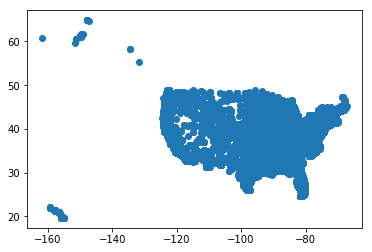

In [6]:
lat = []
long = []
for tup in coord_pairs:
    lat.append(tup[0])
    long.append(tup[1])
plt.scatter(long, lat)
plt.show()

## Filtering outliers

`lower_48_pairs`: Excludes the Alaska and Hawaii points.

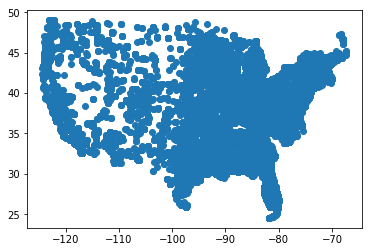

In [7]:
lower_48_pairs = []
for tup in coord_pairs:
    if tup[1] > -131:
        lower_48_pairs.append(tup)
lat48 = []
long48 = []
for tup in lower_48_pairs:
    lat48.append(tup[0])
    long48.append(tup[1])
plt.scatter(long48, lat48)
plt.show()

## Clustering

Cluster number:5


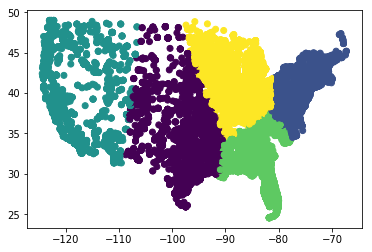

5 largest clusters and their counts: 
Cluster 1: Count = 13285, Coordinates = [ 40.42720545 -75.14783766]
Cluster 4: Count = 11251, Coordinates = [ 41.36678886 -87.04096343]
Cluster 2: Count = 8701, Coordinates = [  38.19691696 -118.30623729]
Cluster 3: Count = 8507, Coordinates = [ 30.99550263 -82.99143479]
Cluster 0: Count = 7436, Coordinates = [ 34.75549199 -98.03159003]


Cluster number:10


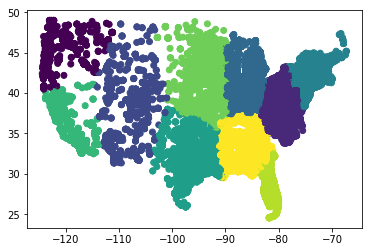

5 largest clusters and their counts: 
Cluster 4: Count = 8831, Coordinates = [ 41.28234195 -73.71478006]
Cluster 3: Count = 7897, Coordinates = [ 41.41944007 -86.02477824]
Cluster 1: Count = 6381, Coordinates = [ 38.36201729 -78.86301182]
Cluster 6: Count = 5372, Coordinates = [  35.67855183 -119.26521594]
Cluster 5: Count = 4671, Coordinates = [ 32.00681438 -96.44231221]


Cluster number:25


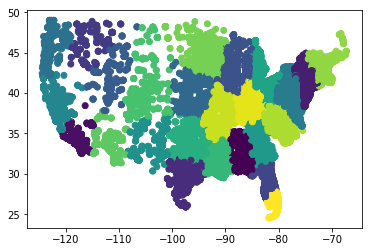

5 largest clusters and their counts: 
Cluster 2: Count = 6131, Coordinates = [ 40.77559575 -74.42784041]
Cluster 6: Count = 3869, Coordinates = [ 42.3340025  -87.86121737]
Cluster 10: Count = 3671, Coordinates = [ 39.43243673 -77.54410226]
Cluster 1: Count = 3075, Coordinates = [  34.00987223 -117.69426941]
Cluster 14: Count = 2976, Coordinates = [ 41.63331645 -82.77846528]


Cluster number:50


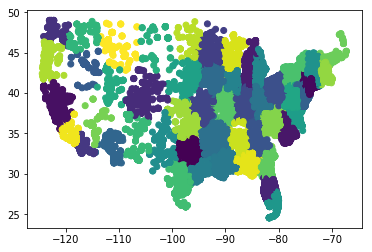

5 largest clusters and their counts: 
Cluster 1: Count = 3559, Coordinates = [ 40.80759472 -73.97846254]
Cluster 22: Count = 2373, Coordinates = [ 41.82820534 -87.99709884]
Cluster 2: Count = 2214, Coordinates = [  38.1153951 -121.6920535]
Cluster 29: Count = 2063, Coordinates = [ 39.14213434 -77.16550137]
Cluster 15: Count = 2016, Coordinates = [ 40.05628076 -75.22606469]


Cluster number:75


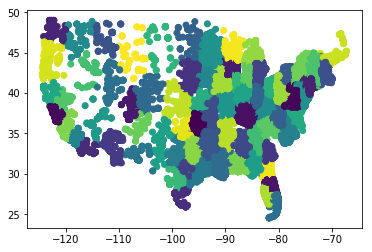

5 largest clusters and their counts: 
Cluster 7: Count = 3541, Coordinates = [ 40.80276537 -73.97879974]
Cluster 49: Count = 2103, Coordinates = [ 41.82833562 -87.89550753]
Cluster 1: Count = 2012, Coordinates = [ 39.12914001 -77.107752  ]
Cluster 37: Count = 1999, Coordinates = [ 40.05433674 -75.22038006]
Cluster 33: Count = 1959, Coordinates = [  34.00745474 -118.09653037]


Cluster number:100


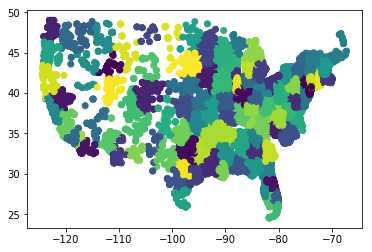

5 largest clusters and their counts: 
Cluster 0: Count = 2333, Coordinates = [ 40.70118346 -74.24084679]
Cluster 38: Count = 1697, Coordinates = [ 39.96859606 -75.156677  ]
Cluster 12: Count = 1667, Coordinates = [ 39.04811697 -77.03536591]
Cluster 47: Count = 1385, Coordinates = [  37.72333406 -122.08978762]
Cluster 15: Count = 1346, Coordinates = [ 42.04037532 -88.08887466]




In [8]:
add_list = [5, 10, 25, 50, 75, 100]
for k in add_list:
    print("Cluster number:" + str(k))
    km = KMeans(n_clusters=k)
    km = km.fit(lower_48_pairs)
    km.labels_
    plt.scatter([x[1] for x in lower_48_pairs],[x[0] for x in lower_48_pairs], c=km.labels_ )
    plt.show()
    cluster, counts = numpy.unique(km.labels_, return_counts=True)
    maxcounts = numpy.sort(counts)
    centroids = km.cluster_centers_
    max_list = {}
    for c in maxcounts[-5:]:
        index = numpy.where(counts == c)
        index = index[0][0]
        max_list[index] = counts[index]   
    print("5 largest clusters and their counts: ")
    add = []
    for i in max_list:
        add.append("Cluster "+str(i) +": Count = "+str(max_list[i])+", Coordinates = "+str(centroids[i]))
        
    for i in range(len(add)):
        ind = 4 - i
        print(add[ind])
    print("\n")


## Analysis

The "best" looking clusters is when n_clusters is 50. The 50 clusters breaks the U.S. into small segments that do not cover large parts of the U.S., such as seen in the west U.S. when n_clusters = 25. Also, the clusters aren't so small that it may be hard to find major differences between neighboring clusters, like when n_clusters = 75. Also, the United States is already broken into 50 states, so having 50 groups will cluster the U.S. into "familiar" sized groups. 

5 biggest centroid locations: 
- Hudson River, in between Manhattan and New Jersey 
- Outside of Chicago, Il 
- In between San Fransico, CA and Sacramento, CA
- Between Balitmore, MA and Washington D.C. (closer to Washington D.C.) 
- Outside of Philidelphia, PA

These results are expected, since they are close to the biggest cities in America, or between two large and relatively close cities. The concentrations of people is high in these areas. 

I had about 5 clusters in New England. In California/Oregon/Washington, I had about 8 clusters. 


The clusters never appear to clearly outline the states. This is of great importance since states are often used as a categorical variable, but they are not the clusters that group people in the most accurate/efficent manner. To conduct statistical analysis on categorical variables, using states may have less meaning than if the same analysis was grouped on the network clusters. 